In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("F:\IITB Curricullum\Sem 2\Freight and Logistics\Project\California Port\Historic_Tonage_Data_Merged.csv",index_col="Year")

In [3]:
df1s1 = df1.loc[1920:1942] #Pre World War 2
df1s2 = df1.loc[1947:1970] #Post World War 2 to 1970
df1s3 = df1.loc[1978:2015] #From 1978 to 2015

In [4]:
df1

,Total
Year,
1920,3.528280
1921,4.296254
1922,6.533589
1923,18.870102
1924,25.550464
...,...
2011,160.900000
2012,174.900000
2013,165.100000


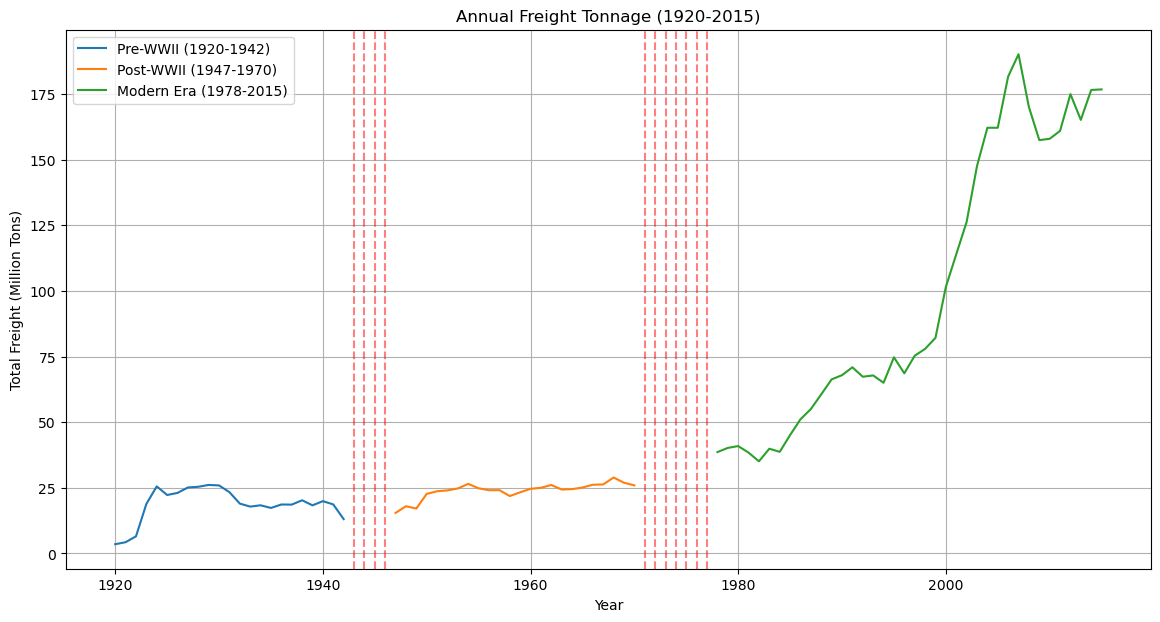

In [5]:
plt.figure(figsize=(14, 7))

# Plot each segment
plt.plot(df1s1.index, df1s1['Total'], label='Pre-WWII (1920-1942)')
plt.plot(df1s2.index, df1s2['Total'], label='Post-WWII (1947-1970)')
plt.plot(df1s3.index, df1s3['Total'], label='Modern Era (1978-2015)')

# mark the missing WWII years
for year in range(1943, 1947):
    plt.axvline(x=year, color='r', linestyle='--', alpha=0.5)

# mark the missing years between 1970 and 1978
for year in range(1971, 1978):
    plt.axvline(x=year, color='r', linestyle='--', alpha=0.5)

plt.title('Annual Freight Tonnage (1920-2015)')
plt.xlabel('Year')
plt.ylabel('Total Freight (Million Tons)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
df2 = pd.read_excel(r"F:\IITB Curricullum\Sem 2\Freight and Logistics\Project\California Port\US GDP Processed Data(1929-2022).xlsx",index_col="Year")
# US Real GDP Numbers in Billion $ for the period of 1929 to 2022
df2.head()

,GDP
Year,
1929,1191.1
1930,1089.8
1931,1020.0
1932,888.4
1933,877.4


In [7]:
import seaborn as sns

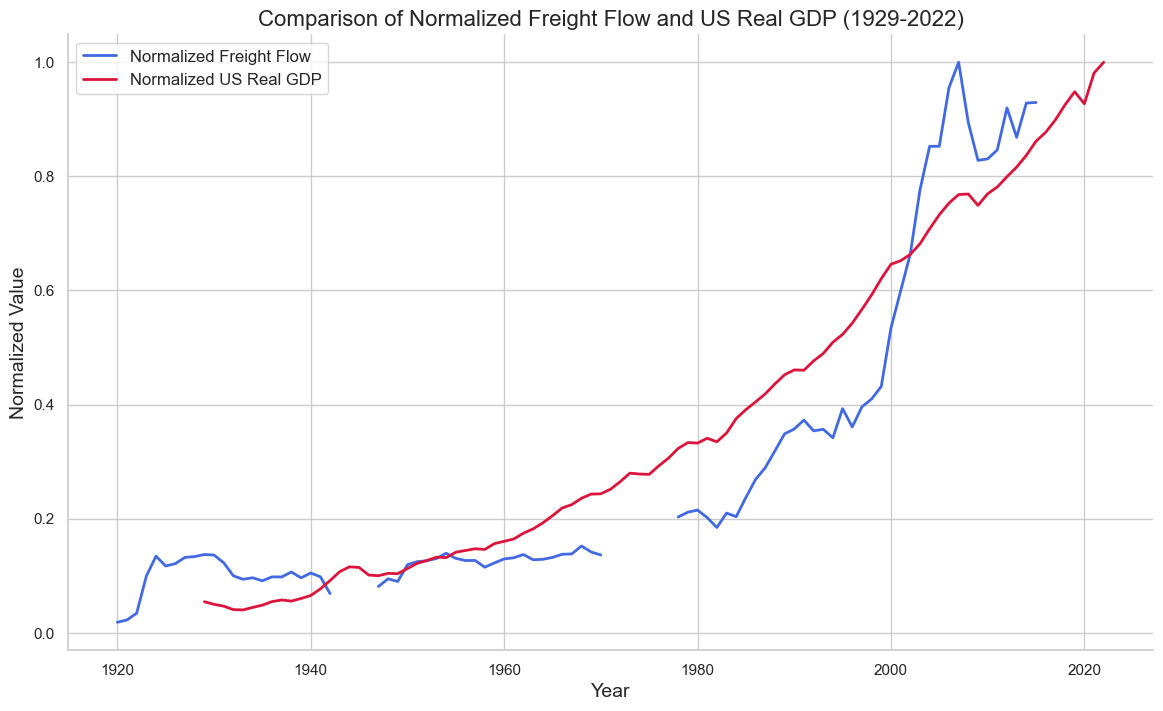

In [8]:
# Normalizing the freight data
df1['Normalized Freight'] = df1['Total'] / df1['Total'].max()

# Normalizing the GDP data
df2['Normalized GDP'] = df2['GDP'] / df2['GDP'].max()

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Plot the normalized freight data using a solid line
plt.plot(df1.index, df1['Normalized Freight'], label='Normalized Freight Flow', color='royalblue', linewidth=2)

# Plot the normalized GDP data using a solid line 
plt.plot(df2.index, df2['Normalized GDP'], label='Normalized US Real GDP', color='crimson', linewidth=2)

# Add title and labels 
plt.title('Comparison of Normalized Freight Flow and US Real GDP (1929-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized Value', fontsize=14)

# Improve the legend to better differentiate the lines
plt.legend(frameon=True, fontsize=12, loc='upper left')

# Remove the top and right spines for a cleaner look
sns.despine()

# Optionally, adjust the x-axis and y-axis limits if needed
# plt.xlim([1920, 2022])
# plt.ylim([0, 1])

plt.show()


In [9]:
df3 = pd.read_excel("F:\IITB Curricullum\Sem 2\Freight and Logistics\Project\California Port\Cleaned Oil Data.xlsx",index_col="Year")
df3.head()

,Total
Year,
1965,1567.87374
1966,1702.52652
1967,1826.50842
1968,1992.62344
1969,2144.86838


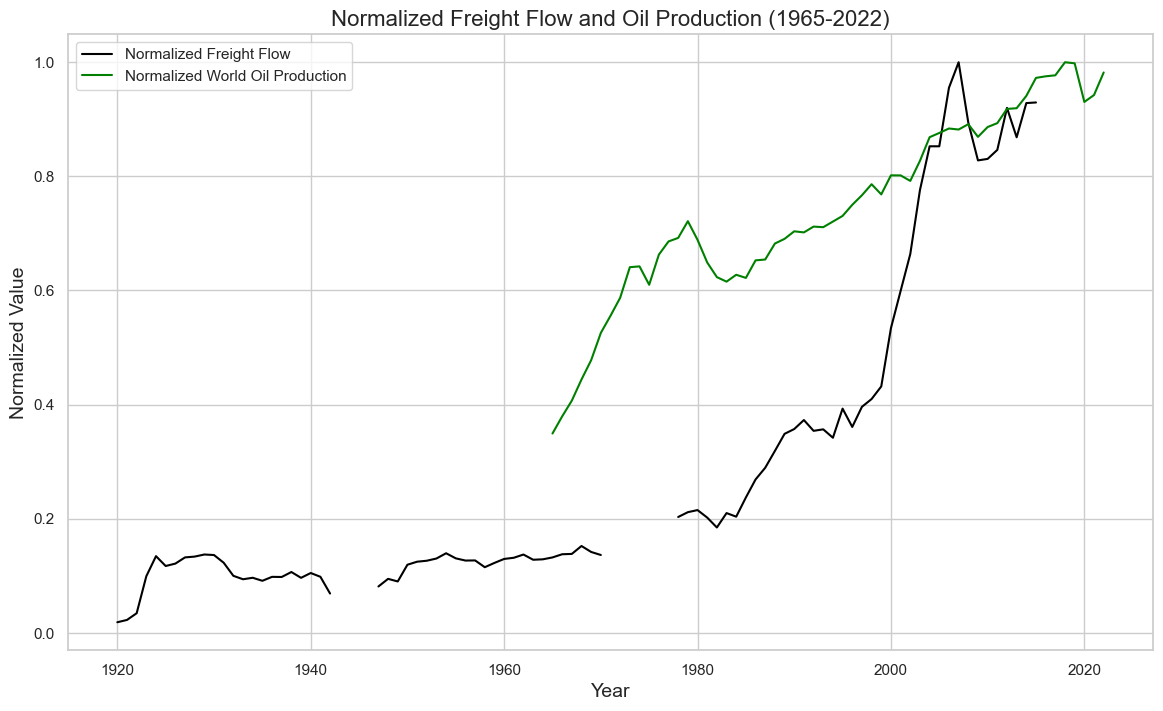

In [10]:
# Normalize the oil production data
df3['Normalized Total'] = df3['Total'] / df3['Total'].max()

# Create the plot with both freight data and oil production data
plt.figure(figsize=(14, 8))

# Plot the normalized freight flow data
plt.plot(df1.index, df1['Normalized Freight'], label='Normalized Freight Flow', color='black')

# Plot the normalized oil production data
plt.plot(df3.index, df3['Normalized Total'], label='Normalized World Oil Production', color='green')

# Add title and labels with proper formatting
plt.title('Normalized Freight Flow and Oil Production (1965-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized Value', fontsize=14)

# Add a legend to differentiate between the data series
plt.legend()

# Show grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()


In [11]:
df1.rename(columns={"Total":"Freight (MMT)"},inplace=True)

In [12]:
df2.rename(columns={"GDP":"GDP (Billion $)"},inplace=True)

In [13]:
df3.rename(columns={"Total":"Oil (MMT)"},inplace=True)

In [14]:
df_merged = pd.concat([df1.loc[1978:2015],df2.loc[1978:2015],df3.loc[1978:2015]],axis=1)
df_merged.drop(["Normalized Freight","Normalized GDP","Normalized Total"],axis=1,inplace=True)

In [15]:
df_merged.head()

,Freight (MMT),GDP (Billion $),Oil (MMT)
Year,,,
1978,38.6,7052.7,3106.67862
1979,40.2,7276.0,3238.16230
1980,40.9,7257.3,3091.66388
1981,38.4,7441.5,2913.49424
1982,35.1,7307.3,2798.25682


In [16]:
df_merged

,Freight (MMT),GDP (Billion $),Oil (MMT)
Year,,,
1978,38.6,7052.7,3106.67862
1979,40.2,7276.0,3238.16230
1980,40.9,7257.3,3091.66388
1981,38.4,7441.5,2913.49424
1982,35.1,7307.3,2798.25682
1983,39.9,7642.3,2762.53414
1984,38.7,8195.3,2816.69006
1985,45.1,8537.0,2792.04934
1986,51.1,8832.6,2929.96754


In [17]:
# Let's start by performing descriptive statistics and finding correlations on the 
# provided dataset which is already loaded into a pandas DataFrame named `df_merged`.

# We'll generate a heatmap for visualizing the correlation matrix.
# Finally, we will build a predictive model using the data.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display the descriptive statistics for the dataframe
df_merged.describe()


,Freight (MMT),GDP (Billion $),Oil (MMT)
count,38.000000,38.000000,38.000000
mean,99.784211,12475.234211,3460.399630
std,53.789271,3775.139220,466.129508
min,35.100000,7052.700000,2762.534140
25%,56.400000,9233.125000,3101.089050
50%,75.000000,12106.950000,3404.500920
75%,160.150000,16258.825000,3924.500780
max,190.100000,18799.600000,4365.542320


In [18]:
# Compute the correlation matrix
df_merged.corr()


,Freight (MMT),GDP (Billion $),Oil (MMT)
Freight (MMT),1.000000,0.964451,0.955317
GDP (Billion $),0.964451,1.000000,0.967012
Oil (MMT),0.955317,0.967012,1.000000


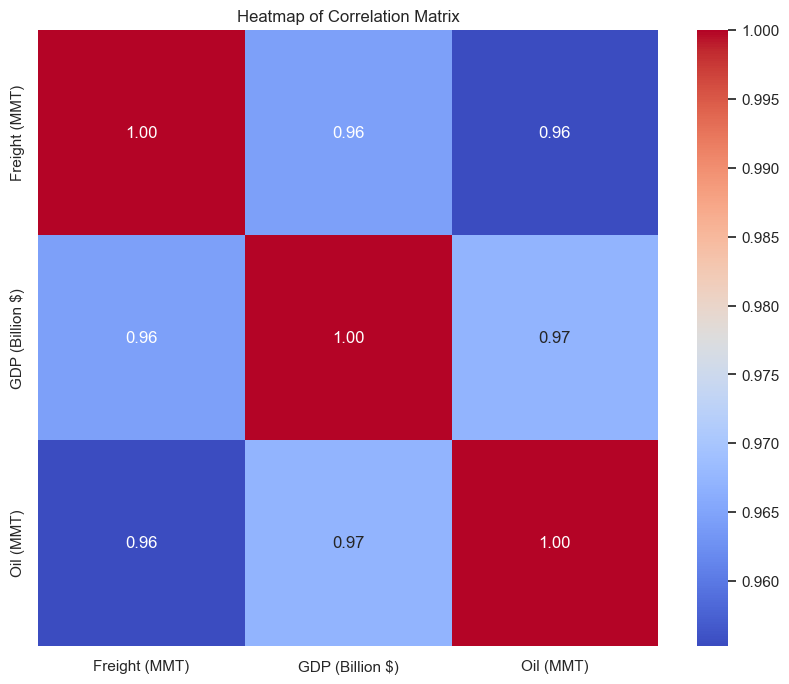

In [19]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_merged.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [20]:
# Proceed to model building
# Define the independent variables (GDP and Oil) and the dependent variable (Freight)
X = df_merged[['GDP (Billion $)', 'Oil (MMT)']]
y = df_merged['Freight (MMT)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [21]:
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the model's statistics
model_stats = {
    'Coefficients': model.coef_,
    'Intercept': model.intercept_,
    'Mean Squared Error': mse,
    'R-squared': r2
}

model_stats

{'Coefficients': array([0.00923583, 0.03496939]),
 'Intercept': -136.1482253922663,
 'Mean Squared Error': 360.7896797124848,
 'R-squared': 0.8341721877161516}

The cell below is optional, it is just the summary of OLS based regression.

In [22]:
import statsmodels.api as sm

# Add a constant to the model (the intercept)
X_with_const = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_with_const).fit()

# Get the summary of the model
model_summary = ols_model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Freight (MMT)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     265.2
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           7.17e-22
Time:                        18:42:48   Log-Likelihood:                -151.99
No. Observations:                  38   AIC:                             310.0
Df Residuals:                      35   BIC:                             314.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -151.1443     38.350     -3.941      0.000    -228.999     -73.289
GDP (Billion $)     0.0089      0.002      3.794      0.001       0.004       0.014
Oil (MMT)           0.0403      0.019      2.117      0.041       0.002       0.079
==============================================================================
Omnibus:                        0.661   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.183
Skew:                          -0.151   Prob(JB):                        0.913
Kurtosis:                       3.156   Cond. No.                     2.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""